In [5]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob
import argparse

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
recon_path = '/home/ubuntu/reconstructions/'
#recon_path = '/home/sarah/deblurring/reconstructions/'
filelist = os.listdir(recon_path)
print(filelist)

#filespec = ['163c','strip=8_']
filespec = ['beads2','median50']
# filespec = ['163a','strip=8']
# filespec = ['174d','strip=8']
# filespec = ['163c','strip=6','17]8e-4']

for spec in filespec:
    filelist = [file for file in filelist if spec in file]
assert not len(filelist) > 1, "More than one dataset with criterion found: " + str(filelist)
assert not len(filelist) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
output_filename_full = recon_path +  filelist[0]

['beads2_raster_45ms_coded_raster_100_motion_deblur_2019_02_04_16_34_43_strip=0_channel=0_subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]median250.npz', 'beads2_raster_45ms_coded_raster_100_motion_deblur_2019_02_04_16_34_43_strip=0_channel=0_subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]50.npz', 'beads2_raster_45ms_coded_raster_100_motion_deblur_2019_02_04_16_34_43_strip=0_channel=0_subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17].npz', 'beads2_raster_45ms_coded_raster_100_motion_deblur_2019_02_04_16_34_43_strip=0_channel=0_subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]250.npz', 'beads2_raster_45ms_coded_raster_100_motion_deblur_2019_02_04_16_34_43_strip=0_channel=0_subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]median50.npz', 'beads2_raster_45ms_coded_raster_100_motion_deblur_2019_02_04_16_34_43_strip=0_channel=0_subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1

In [40]:
data = np.load(output_filename_full)
object_recovered = data['object_recovered']
y = data['y']

<IPython.core.display.Javascript object>


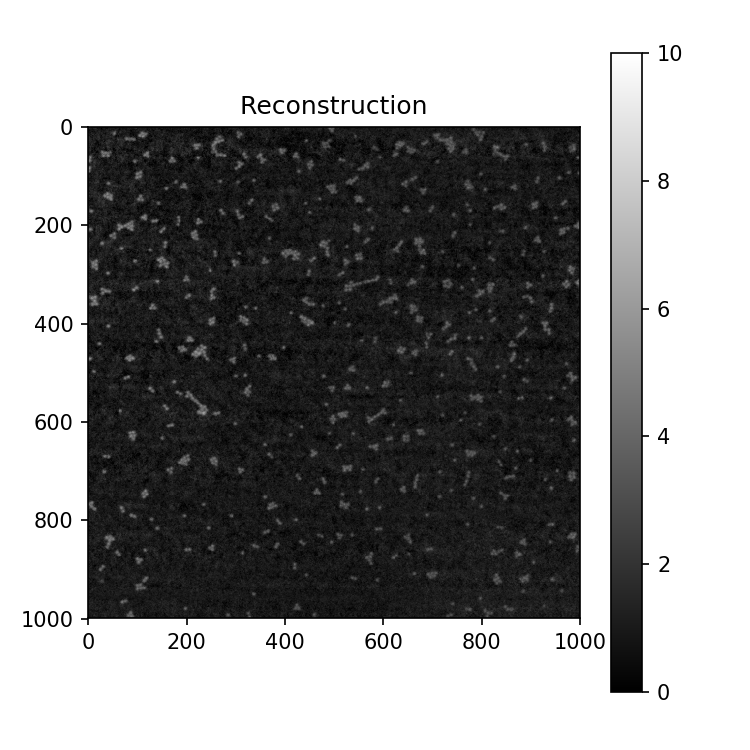

In [41]:
figsize = (5,5) #(10,3)
aspect_ratio = 1 # yp.shape(object_recovered)[0] / yp.shape(object_recovered)[1] + 0.1
plt.figure(figsize=(figsize[0], figsize[0] * aspect_ratio))
plot_object = np.abs(yp.changeBackend(object_recovered, 'numpy'))
plot_object = plot_object[500:1500,24500:25500]
plt.imshow(plot_object, cmap='gray')
plt.title('Reconstruction')
plt.tight_layout()
plt.clim([0,10])
plt.colorbar()

In [102]:
plt.imsave('/home/sarah/Dropbox/deblurring/comp_img_lunch/recovered'+filespec[1][:-1]+'.png',plot_object[:,10000:20000],cmap='gray')

<IPython.core.display.Javascript object>


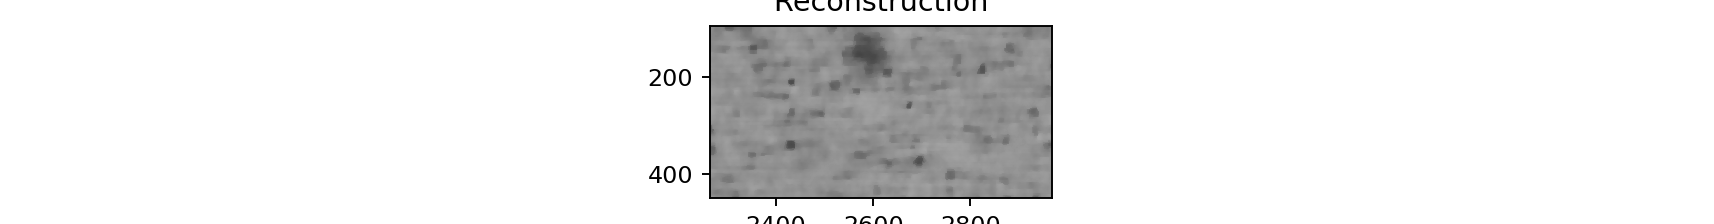

In [52]:
figsize = (10,3)
aspect_ratio = yp.shape(object_recovered_compare)[0] / yp.shape(object_recovered_compare)[1] + 0.1
plt.figure(figsize=(figsize[0], figsize[0] * aspect_ratio))
#plot_object = np.abs(yp.changeBackend(object_recovered_compare-object_recovered, 'numpy'))
plot_object = np.abs(yp.changeBackend(object_recovered_compare, 'numpy'))
#plot_object = np.abs(yp.changeBackend(object_recovered, 'numpy'))
plt.imshow(plot_object, cmap='gray')
plt.title('Reconstruction')
plt.tight_layout()
#plt.colorbar()

In [5]:
object_recovered_compare = object_recovered

In [205]:
np.amax(plot_object)

0.0

## View Data

In [72]:
recon_path = '/home/ubuntu/reconstructions/'
recon_path = '/home/sarah/deblurring/reconstructions/'
# Define user for path setting
dataset_path = '/home/sarah/deblurring/datasets/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label = '163c'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

dataset_full_path = filtered_dataset_list[0]

# Create dataset object (loads metadata)
dataset = Dataset(dataset_full_path, use_experimental_background='res' not in dataset_label)

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

Loading 1 frames...


In [73]:
force_normalization_computation = False

frame_normalization_path = os.path.join(dataset_full_path, 'frame_normalization.npz')
if os.path.exists(frame_normalization_path) and not force_normalization_computation:
    q = np.load(frame_normalization_path)
    frame_normalization_list_x = q['frame_normalization_list_x']
    frame_normalization_list_y = q['frame_normalization_list_y']
else:
    # Calculation normalization vectors
    (frame_normalization_list_y, frame_normalization_list_x) = md.recon.normalize_measurements(dataset)
    
    # Save result
    np.savez_compressed(frame_normalization_path, frame_normalization_list_y=frame_normalization_list_y, frame_normalization_list_x=frame_normalization_list_x)

In [76]:
dataset.position_segment_indicies = [20]

<IPython.core.display.Javascript object>


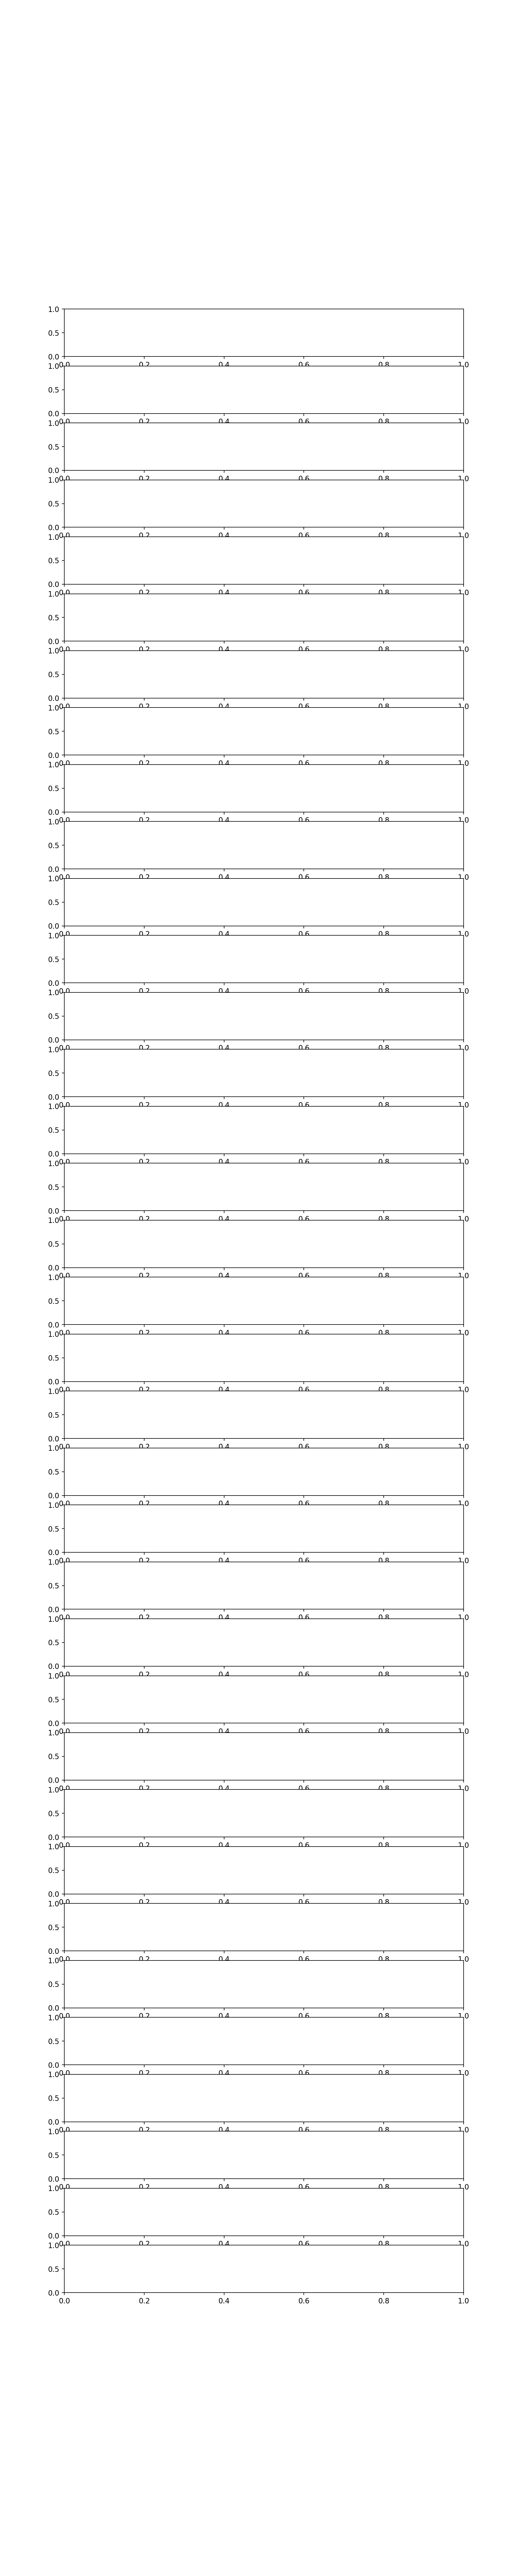

In [85]:
plt.figure(figsize=(10,50))
for i,frame in enumerate(dataset.frame_list):
    plt.subplot(len(dataset.frame_list),1,i+1)
    plt.imsave('/home/sarah/Dropbox/deblurring/comp_img_lunch/raw20_'+str(i),np.abs(frame),cmap='gray')